In [56]:
# Importo linrerias necesarias
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import det_curve
from sklearn.metrics import accuracy_score

In [57]:
# Preparo los datos
data = pd.read_csv('../archivo_modificado_final.csv')

# Definir el umbral de no nulos
umbral = 0.90  

# Calcular el porcentaje de valores no nulos por columna
porcentaje_no_nulos = data.notnull().mean()

# Filtrar las columnas que cumplen con el umbral
columnas_filtradas = porcentaje_no_nulos[porcentaje_no_nulos > umbral].index

# Crear un nuevo DataFrame con solo esas columnas
df_filtrado = data[columnas_filtradas]

# Mostrar el resultado
print(df_filtrado.shape)

(7440, 63)


In [58]:
# Definir el umbral de no nulos
umbral_filas = 0.30  

# Calcular el número mínimo de valores no nulos requeridos por fila
min_no_nulos = int(umbral_filas * df_filtrado.shape[1])

# Eliminar las filas que no cumplen con el umbral
df_filtrado_filas = df_filtrado.dropna(thresh=min_no_nulos)

# Mostrar el resultado
print(df_filtrado_filas.shape)

(7440, 63)


In [ ]:
# Saco la mediana de cada columna y la relleno en los valores nulos
df_filtrado_filas2 = df_filtrado_filas.drop(columns=['usuario'])
df_filtrado_filas2 = df_filtrado_filas2.fillna(df_filtrado_filas2.mean())
df_filtrado_filas2 = df_filtrado_filas2.round(2)

In [51]:


# Separar características y etiquetas
X = df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).values  # Todas las columnas excepto la tercera como características
y = df_filtrado_filas2.iloc[:, 1].values  # Tercera columna como etiqueta


# Reemplazar valores infinitos por NaN
X[np.isinf(X)] = np.nan

# Reemplazar NaN por la media de la columna
X = np.nan_to_num(X, nan=np.nanmean(X))

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar etiquetas
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en test: {test_acc * 100:.2f}%')

# Obtener predicciones de probabilidad
y_probs = model.predict(X_test)

# Obtener las predicciones del modelo
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calcular la precisión de cada dígito
for i in range(10):
    # Filtrar los valores para el dígito i
    y_true_digit = (y_test == i)
    y_pred_digit = (y_pred == i)

    # Calcular precisión para ese dígito
    digit_accuracy = accuracy_score(y_true_digit, y_pred_digit)
    print(f'Precisión para el dígito {i}: {digit_accuracy * 100:.2f}%')

Epoch 1/30


c:\Users\BiDAlab\Proy_ASMI\ASMI_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4350 - loss: 1.6984 - val_accuracy: 0.8555 - val_loss: 0.4828
Epoch 2/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.5507 - val_accuracy: 0.8918 - val_loss: 0.3195
Epoch 3/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.3803 - val_accuracy: 0.9126 - val_loss: 0.2570
Epoch 4/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.3054 - val_accuracy: 0.9274 - val_loss: 0.2240
Epoch 5/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9194 - loss: 0.2609 - val_accuracy: 0.9321 - val_loss: 0.2000
Epoch 6/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2431 - val_accuracy: 0.9355 - val_loss: 0.1952
Epoch 7/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9296 - loss: 0.2187 - val_accuracy: 0.9388 - val_loss: 0.1865
Epoch 8/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9405 - loss: 0.1838 - val_accuracy: 0.9395 - val_

PermutationExplainer explainer: 1001it [00:49, 16.11it/s]                         
C:\Users\BiDAlab\AppData\Local\Temp\ipykernel_4280\2352393723.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:1000], feature_names=df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).columns)


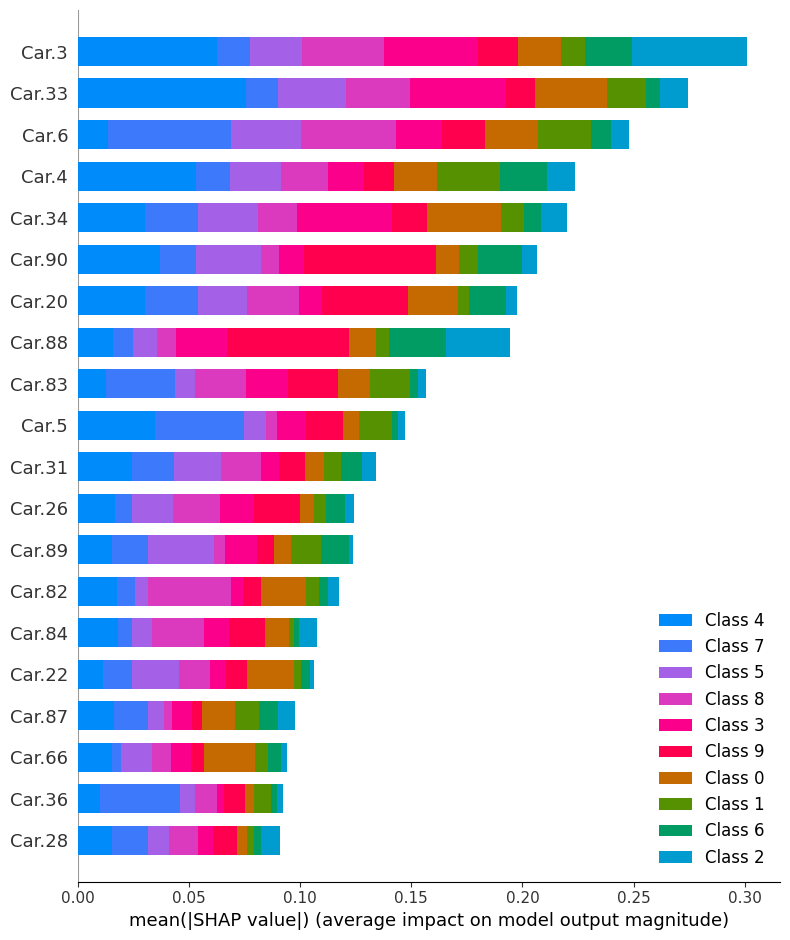

In [52]:
import shap

# Crear un explainer basado en el modelo entrenado
explainer = shap.Explainer(model, X_train)

# Obtener valores SHAP para las primeras 100 muestras (puedes aumentar)
shap_values = explainer(X_test[:1000])

# Visualizar importancia de características
shap.summary_plot(shap_values, X_test[:1000], feature_names=df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).columns)


In [60]:
# Entrenamiento con la 1ª sesión y reconocer con la otra, y viceversa 
# Reemplazar valores infinitos por NaN
# Separar características y etiquetas
df_filtrado_filas2_X = df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).values  # Todas las columnas excepto la tercera como características
df_filtrado_filas2_y = df_filtrado_filas2.iloc[:, 1].values  # Tercera columna como etiqueta

df_filtrado_filas2_X[np.isinf(X)] = np.nan

# Reemplazar NaN por la media de la columna
df_filtrado_filas2_X = np.nan_to_num(df_filtrado_filas2_X, nan=np.nanmean(df_filtrado_filas2_X))

# Seleccionamos las filas correspondientes a la sesión 1 para entrenamiento
data_train = df_filtrado_filas2_X[df_filtrado_filas2_X['sesion'] == 1]

# Seleccionamos las filas correspondientes a la sesión 2 para prueba
data_test = df_filtrado_filas2_y[df_filtrado_filas2_y['sesion'] == 2]

# Separar características y etiquetas para entrenamiento y prueba
X_train = data_train.drop(columns=['usuario', 'sesion', 'digito', 'usuario_num', 'muestra']).values
y_train = data_train['digito'].values

X_test = data_test.drop(columns=['usuario', 'sesion', 'digito', 'usuario_num', 'muestra']).values
y_test = data_test['digito'].values

# Normalizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Codificar etiquetas
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Reemplazar valores infinitos por NaN
X[np.isinf(X)] = np.nan

# Reemplazar NaN por la media de la columna
X = np.nan_to_num(X, nan=np.nanmean(X))

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar etiquetas
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en test: {test_acc * 100:.2f}%')

# Obtener predicciones de probabilidad
y_probs = model.predict(X_test)

# Obtener las predicciones del modelo
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calcular la precisión de cada dígito
for i in range(10):
    # Filtrar los valores para el dígito i
    y_true_digit = (y_test == i)
    y_pred_digit = (y_pred == i)

    # Calcular precisión para ese dígito
    digit_accuracy = accuracy_score(y_true_digit, y_pred_digit)
    print(f'Precisión para el dígito {i}: {digit_accuracy * 100:.2f}%')

## EJECUCION SESION 1/2